In [42]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [43]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.0.0
accelerate                   0.29.2
aiohttp                      3.9.3
aiosignal                    1.3.1
altgraph                     0.17.2
anyio                        4.3.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.7.0
boto3                        1.34.81
botocore                     1.34.81
Brotli                       1.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                        

In [44]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [45]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [46]:
import cv2
import imghdr

In [47]:
data_dir = "data"

In [48]:
crush_data_dir = "crushed_data"

In [49]:
image_exts = {"png", "jpg", "jpeg", "bmp"}

In [50]:
for image_class in os.listdir(crush_data_dir):
    class_path = os.path.join(crush_data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [51]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [52]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 445 files belonging to 2 classes.


In [13]:
data_iteretaor = data.as_numpy_iterator()

In [14]:
data_iteretaor

In [15]:
batch = data_iteretaor.next()

2024-04-25 01:05:47.271955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:05:47.450514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [16]:
batch

(array([[[[ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          ...,
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ]],
 
         [[ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          ...,
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ]],
 
         [[ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          ...,
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ],
          [ 75.      , 104.      , 110.      ]],
 
         ...,
 
         [[ 75.      , 104.      , 110.      ],
          [ 75.   

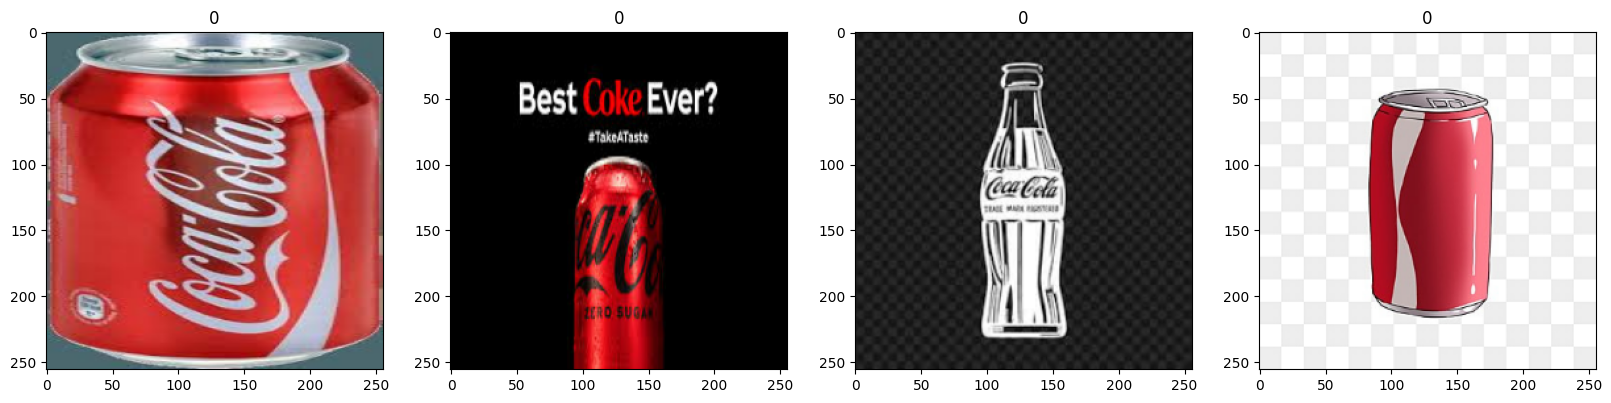

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 0 : Coca-Cola
Class 1 : Pepsi

In [18]:
### Data Scaling
data = data.map(lambda x, y: (x / 255, y))

In [19]:
data.as_numpy_iterator().next()

2024-04-25 01:05:53.056129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:05:53.228780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9659697 , 0.9659697 , 0.9659697 ],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9659697 , 0.9659697 , 0.9659697 ],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9659697 , 0.9659697 , 0.9659697 ],
          [0.96862745, 0.96862745, 0.96862745]],
 
         ...,
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862

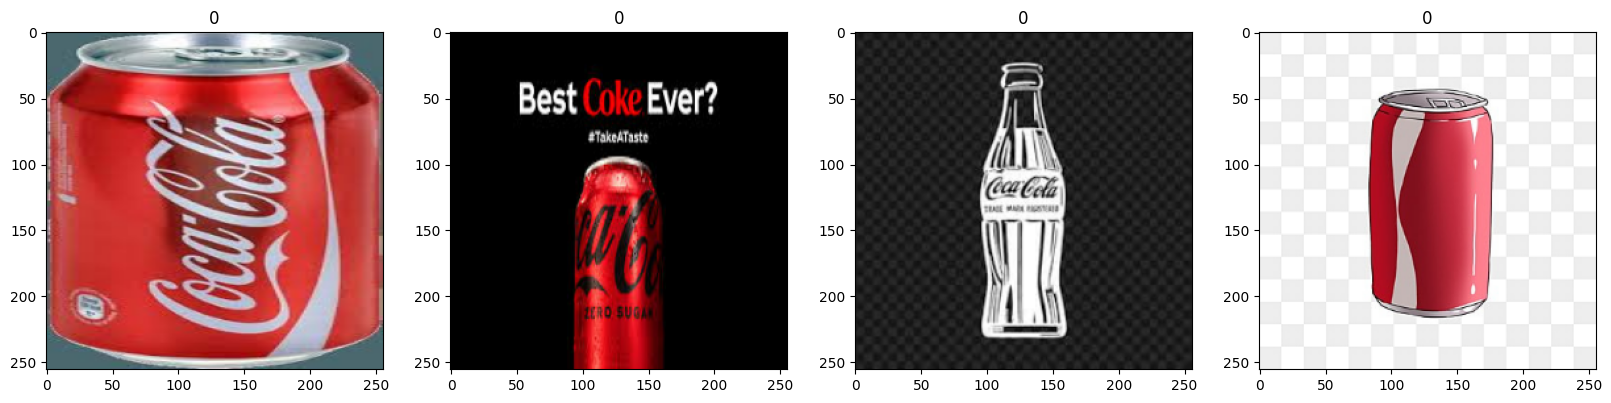

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
crush_data = tf.keras.utils.image_dataset_from_directory("crushed_data")

In [ ]:
crush_data_iteretaor = crush_data.as_numpy_iterator()

In [ ]:
crush_data_iteretaor

In [ ]:
crush_batch = crush_data_iteretaor.next()

In [ ]:
crush_batch

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(crush_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(crush_batch[1][idx])

In [21]:
data_length = len(data)

In [22]:
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.2)
test_size = data_length - train_size - val_size

In [23]:
train_size + val_size + test_size

14

In [24]:
val_size

2

In [25]:
test_size

3

In [26]:
train_size

9

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [28]:
len(test)

3

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential(
    [
        Conv2D(
            16, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)
        ),
        MaxPooling2D(),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model (example)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [30]:
logdir = "logs"

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20


2024-04-25 01:06:05.291721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-25 01:06:05.335175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:05.500280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:05.774958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 3.3797 - accuracy: 0.4965

2024-04-25 01:06:09.117578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:09.282261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 107ms/step - loss: 3.3797 - accuracy: 0.4965 - val_loss: 5.3446 - val_accuracy: 0.3438
Epoch 2/20


2024-04-25 01:06:09.549568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:09.730199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 5.0702 - accuracy: 0.3438

2024-04-25 01:06:09.895315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 4.3947 - accuracy: 0.3203

2024-04-25 01:06:10.166971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:10.375906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:10.540231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 109ms/step - loss: 4.1948 - accuracy: 0.3194 - val_loss: 1.0826 - val_accuracy: 0.4531
Epoch 3/20


2024-04-25 01:06:10.811094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:10.955678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.9076 - accuracy: 0.4062

2024-04-25 01:06:11.119627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 2.3785 - accuracy: 0.6602

2024-04-25 01:06:11.394495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:11.604879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:11.774003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 108ms/step - loss: 2.3610 - accuracy: 0.6667 - val_loss: 2.0640 - val_accuracy: 0.7031
Epoch 4/20


2024-04-25 01:06:12.043787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:12.188402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 1.7479 - accuracy: 0.6250

2024-04-25 01:06:12.356415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.8650 - accuracy: 0.6836

2024-04-25 01:06:12.634437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:12.848552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:13.015001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.8813 - accuracy: 0.6458 - val_loss: 1.0495 - val_accuracy: 0.4062
Epoch 5/20


2024-04-25 01:06:13.290676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:13.435067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 1.0772 - accuracy: 0.4062

2024-04-25 01:06:13.601346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.8042 - accuracy: 0.5508

2024-04-25 01:06:13.878840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:14.092434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:14.260360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.7731 - accuracy: 0.5764 - val_loss: 0.6776 - val_accuracy: 0.7188
Epoch 6/20


2024-04-25 01:06:14.538022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:14.682591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.6959 - accuracy: 0.7812

2024-04-25 01:06:14.851300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.9866 - accuracy: 0.6523

2024-04-25 01:06:15.126491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:15.340952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:15.507819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.9118 - accuracy: 0.6771 - val_loss: 0.4257 - val_accuracy: 0.8281
Epoch 7/20


2024-04-25 01:06:15.783344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:15.930549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.5554 - accuracy: 0.7500

2024-04-25 01:06:16.098905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.4021 - accuracy: 0.8789

2024-04-25 01:06:16.379837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:16.595098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:16.764227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 112ms/step - loss: 0.3836 - accuracy: 0.8889 - val_loss: 0.3501 - val_accuracy: 0.9219
Epoch 8/20


2024-04-25 01:06:17.042715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:17.190004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9688

2024-04-25 01:06:17.357592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.3065 - accuracy: 0.9102

2024-04-25 01:06:17.643851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:17.861462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:18.028239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 111ms/step - loss: 0.3038 - accuracy: 0.9097 - val_loss: 0.3929 - val_accuracy: 0.8594
Epoch 9/20


2024-04-25 01:06:18.306460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:18.454159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.3029 - accuracy: 0.8438

2024-04-25 01:06:18.624490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.2988 - accuracy: 0.8867

2024-04-25 01:06:18.902613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:19.121878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:19.289382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 111ms/step - loss: 0.2935 - accuracy: 0.8958 - val_loss: 0.1670 - val_accuracy: 0.9844
Epoch 10/20


2024-04-25 01:06:19.568859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:19.714850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.1496 - accuracy: 1.0000

2024-04-25 01:06:19.884102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1258 - accuracy: 0.9727

2024-04-25 01:06:20.164052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:20.375492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:20.547764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.1231 - accuracy: 0.9722 - val_loss: 0.0784 - val_accuracy: 0.9844
Epoch 11/20


2024-04-25 01:06:20.825525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:20.967837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.2180 - accuracy: 0.9688

2024-04-25 01:06:21.135053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1598 - accuracy: 0.9766

2024-04-25 01:06:21.417284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:21.630882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:21.798700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 111ms/step - loss: 0.1475 - accuracy: 0.9757 - val_loss: 0.4941 - val_accuracy: 0.9531
Epoch 12/20


2024-04-25 01:06:22.082041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:22.229089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.2023 - accuracy: 0.9688

2024-04-25 01:06:22.396360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1233 - accuracy: 0.9766

2024-04-25 01:06:22.673656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:22.886168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:23.054244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 111ms/step - loss: 0.1983 - accuracy: 0.9757 - val_loss: 0.0339 - val_accuracy: 0.9844
Epoch 13/20


2024-04-25 01:06:23.336132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:23.484499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0265 - accuracy: 1.0000

2024-04-25 01:06:23.654982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.0856 - accuracy: 0.9844

2024-04-25 01:06:23.935179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:24.157792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:24.331546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 113ms/step - loss: 0.0772 - accuracy: 0.9861 - val_loss: 0.0543 - val_accuracy: 0.9844
Epoch 14/20


2024-04-25 01:06:24.615188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:24.765759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.1307 - accuracy: 0.9375

2024-04-25 01:06:24.936937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1869 - accuracy: 0.9727

2024-04-25 01:06:25.214038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:25.428597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:25.598766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 111ms/step - loss: 0.1768 - accuracy: 0.9722 - val_loss: 0.4161 - val_accuracy: 0.9688
Epoch 15/20


2024-04-25 01:06:25.875316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:26.021867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0327 - accuracy: 1.0000

2024-04-25 01:06:26.188772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1086 - accuracy: 0.9766

2024-04-25 01:06:26.464879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:26.677940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:26.845788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.1804 - accuracy: 0.9757 - val_loss: 0.1011 - val_accuracy: 0.9531
Epoch 16/20


2024-04-25 01:06:27.121679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:27.271126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0162 - accuracy: 1.0000

2024-04-25 01:06:27.438916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1731 - accuracy: 0.9805

2024-04-25 01:06:27.718464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:27.930711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:28.099232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 111ms/step - loss: 0.1590 - accuracy: 0.9792 - val_loss: 0.4402 - val_accuracy: 0.9375
Epoch 17/20


2024-04-25 01:06:28.383172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:28.530769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0074 - accuracy: 1.0000

2024-04-25 01:06:28.700404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1611 - accuracy: 0.9766

2024-04-25 01:06:28.976327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:29.187656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:29.355267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 109ms/step - loss: 0.1462 - accuracy: 0.9792 - val_loss: 0.3641 - val_accuracy: 0.9844
Epoch 18/20


2024-04-25 01:06:29.630250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:29.775653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0264 - accuracy: 1.0000

2024-04-25 01:06:29.942303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1801 - accuracy: 0.9805

2024-04-25 01:06:30.219077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:30.431015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:30.599126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.1617 - accuracy: 0.9826 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 19/20


2024-04-25 01:06:30.875836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:31.021083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0060 - accuracy: 1.0000

2024-04-25 01:06:31.189785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.0602 - accuracy: 0.9844

2024-04-25 01:06:31.469772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:31.698925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:31.870760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 112ms/step - loss: 0.0541 - accuracy: 0.9861 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 20/20


2024-04-25 01:06:32.148543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:32.290931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 2s - loss: 0.0086 - accuracy: 1.0000

2024-04-25 01:06:32.459508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 0.1447 - accuracy: 0.9766

2024-04-25 01:06:32.739554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:32.953814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:33.121976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 110ms/step - loss: 0.1289 - accuracy: 0.9792 - val_loss: 0.0485 - val_accuracy: 0.9844


2024-04-25 01:06:33.398277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


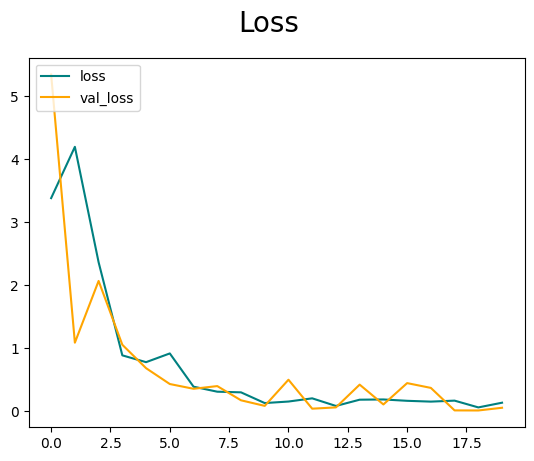

In [33]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

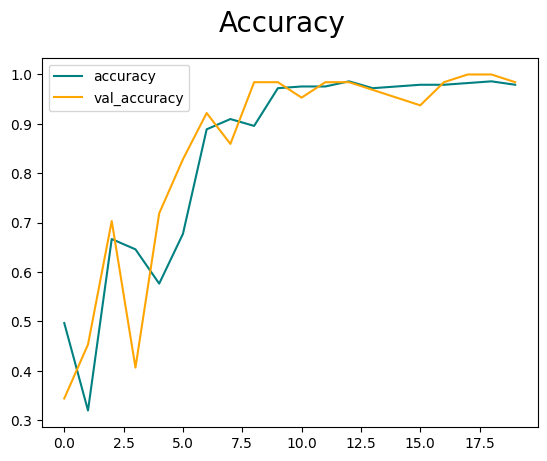

In [34]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-04-25 01:06:33.695205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 01:06:33.865234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 56ms/step


2024-04-25 01:06:34.143484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 1s 501ms/step


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.969697, shape=(), dtype=float32) tf.Tensor(0.969697, shape=(), dtype=float32) tf.Tensor(0.97849464, shape=(), dtype=float32)


In [41]:
for image_class in os.listdir(crush_data_dir):
    class_path = os.path.join(crush_data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [ ]:
import cv2

In [ ]:
def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
capture_image_from_camera(image_path)

In [ ]:
img = cv2.imread("your_image_path_here.jpg")
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

In [ ]:
if yhat > 0.5:
    print(f"Predicted class is Coke")
else:
    print(f"Predicted class is Pepsi")

In [ ]:
import cv2
import numpy as np


def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return None

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()
    return frame


def measure_can_height(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Canny
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(
        edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Assume the largest contour is the can
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        return h  # Height of the can in pixels

    return None


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
image = capture_image_from_camera(image_path)
if image is not None:
    height = measure_can_height(image)
    if height is not None:
        print(f"Measured height of the can in pixels: {height}")
    else:
        print("Can not detected.")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join("models", "imageclassifier.h5"))